In [13]:
from Model import Model
import math
import Parameters
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import Dependency as Dependency
import Util
from ModelData import ModelData
import Parameters
import datetime

In [14]:
def moving_average_compare(data):
    return Util.moving_average(data[0,0:,:])

In [15]:
def moving_average_compare_vaccine(data, index):
    return Util.moving_average(data[index,0,0:,:])

# Setting up hyperparameters

In [16]:
forecast_days = 365
# infectiousness = 0.09
infectiousness = 0.072
save = False
m = Model(forecast_days=forecast_days, infectiousness=infectiousness, prior_immunity=0)

0.2


# Visualization dependencies

In [17]:
def moving_average_compare(data):
    return Util.moving_average(data[0,:,:])

## Display the raw data before forecast

C:\Users\loveb\AppData\Local\Temp\ipykernel_36752\331275729.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1), plt.plot(range(0, deaths.shape[0]), np.sum(deaths, axis=1))


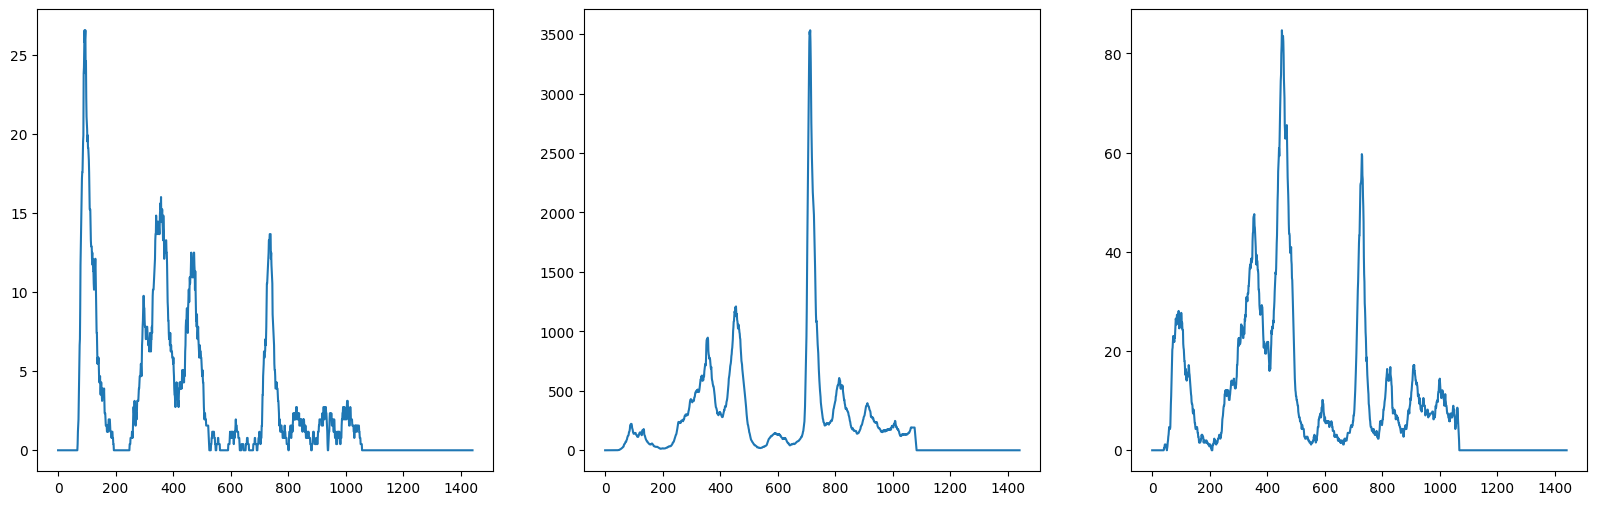

In [18]:
data = m.model_data

deaths = moving_average_compare(data.time_series_deaths)
cases = moving_average_compare(data.time_series_clinical_cases)
hospitalized = moving_average_compare(data.time_series_hospitalized)

plt.figure(figsize=(20,6))
plt.subplot()
plt.subplot(1,3,1), plt.plot(range(0, deaths.shape[0]), np.sum(deaths, axis=1))
plt.subplot(1,3,2), plt.plot(range(0, cases.shape[0]), np.sum(cases, axis=1))
plt.subplot(1,3,3), plt.plot(range(0, hospitalized.shape[0]), np.sum(hospitalized, axis=1))
plt.show()

(4, 528, 1448, 16)
(1442, 16)
13.086799999999998
12.5794
8.19
4.870166035232684


C:\Users\loveb\AppData\Local\Temp\ipykernel_36752\3447792587.py:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,4,1), plt.plot([Parameters.OUTBREAK_FIRST_DAY + datetime.timedelta(days=j) for j in range(1083 + forecast_days  - 6)], (np.mean(vaccinated1, axis=1))), plt.title('vaccine 1'),     plt.xticks(rotation=45, ha='right')


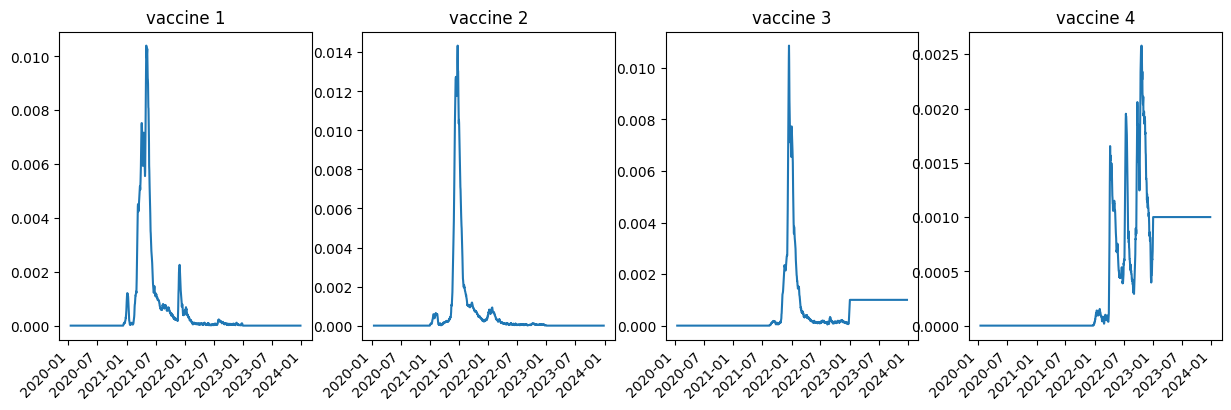

In [19]:
ground_truth_data = m.model_data
immunity = moving_average_compare(ground_truth_data.time_series_immunity)
vaccinated1 = moving_average_compare_vaccine(ground_truth_data.time_series_vaccinated, 0)
vaccinated2 = moving_average_compare_vaccine(ground_truth_data.time_series_vaccinated, 1)
vaccinated3 = moving_average_compare_vaccine(ground_truth_data.time_series_vaccinated, 2)
vaccinated4 = moving_average_compare_vaccine(ground_truth_data.time_series_vaccinated, 3)

print(ground_truth_data.time_series_vaccinated.shape)
print(vaccinated1.shape)

plt.figure(figsize=(15,4))
plt.subplot()
plt.subplot(1,4,1), plt.plot([Parameters.OUTBREAK_FIRST_DAY + datetime.timedelta(days=j) for j in range(1083 + forecast_days  - 6)], (np.mean(vaccinated1, axis=1))), plt.title('vaccine 1'),     plt.xticks(rotation=45, ha='right')
plt.subplot(1,4,2), plt.plot([Parameters.OUTBREAK_FIRST_DAY + datetime.timedelta(days=j) for j in range(1083 + forecast_days  - 6)],  (np.mean(vaccinated2, axis=1))), plt.title('vaccine 2'),     plt.xticks(rotation=45, ha='right')
plt.subplot(1,4,3), plt.plot([Parameters.OUTBREAK_FIRST_DAY + datetime.timedelta(days=j) for j in range(1083 + forecast_days  - 6)],  (np.mean(vaccinated3, axis=1))), plt.title('vaccine 3'),     plt.xticks(rotation=45, ha='right')
plt.subplot(1,4,4), plt.plot([Parameters.OUTBREAK_FIRST_DAY + datetime.timedelta(days=j) for j in range(1083 + forecast_days - 6)],  (np.mean(vaccinated4, axis=1))), plt.title('vaccine 4'),     plt.xticks(rotation=45, ha='right')
print(np.sum(vaccinated1[:1083]))
print(np.sum(vaccinated2[:1083]))
print(np.sum(vaccinated3[:1083]))
print(np.sum(vaccinated4[:1083]))

# Run the model

In [20]:
start_date = (datetime.datetime(2023, 1, 1) - Parameters.OUTBREAK_FIRST_DAY).days

C:\Users\loveb\AppData\Local\Temp\ipykernel_36752\3740227968.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, 1)


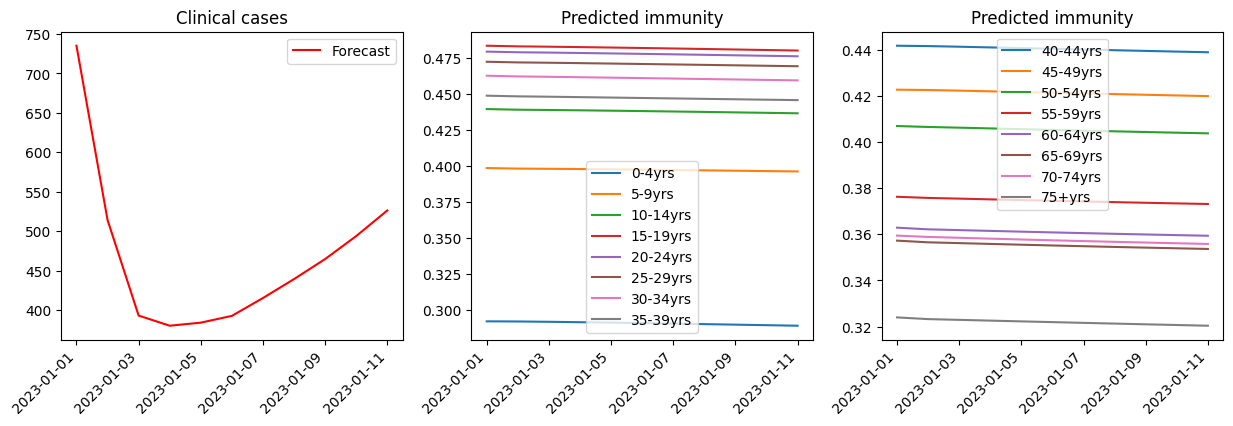

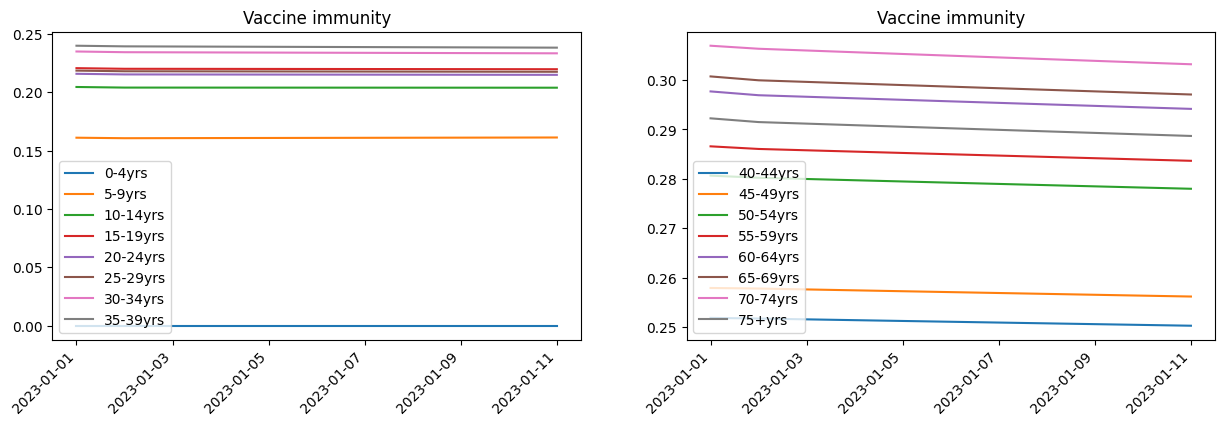

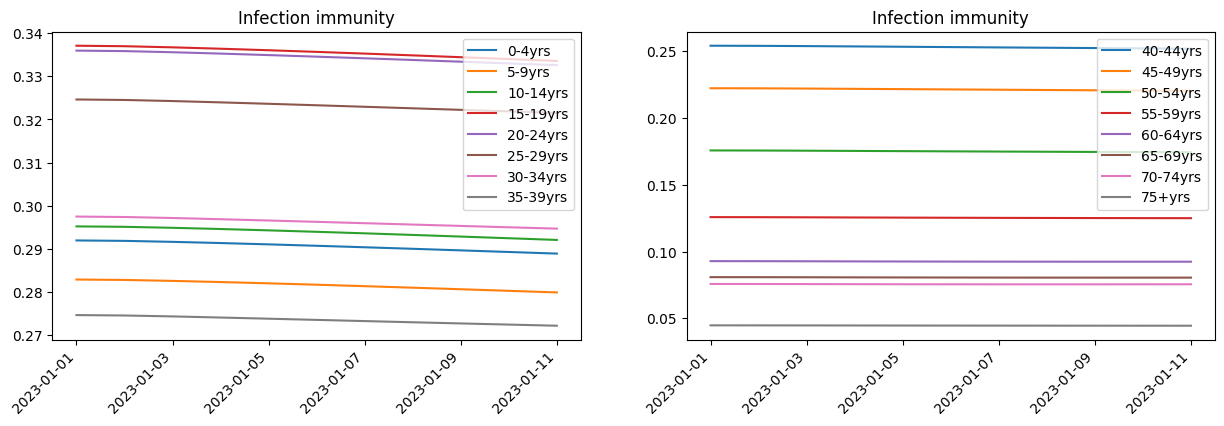

C:\Users\loveb\AppData\Local\Temp\ipykernel_36752\3740227968.py:68: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


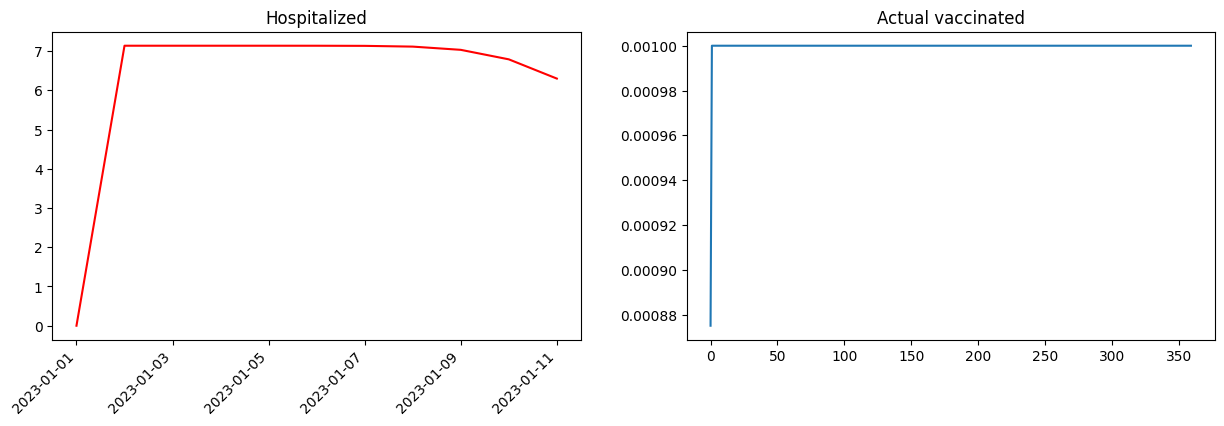

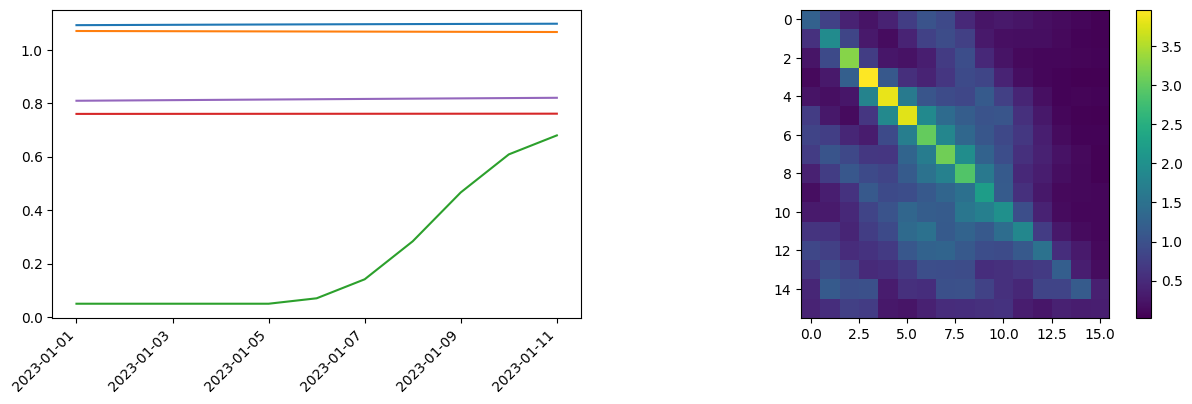

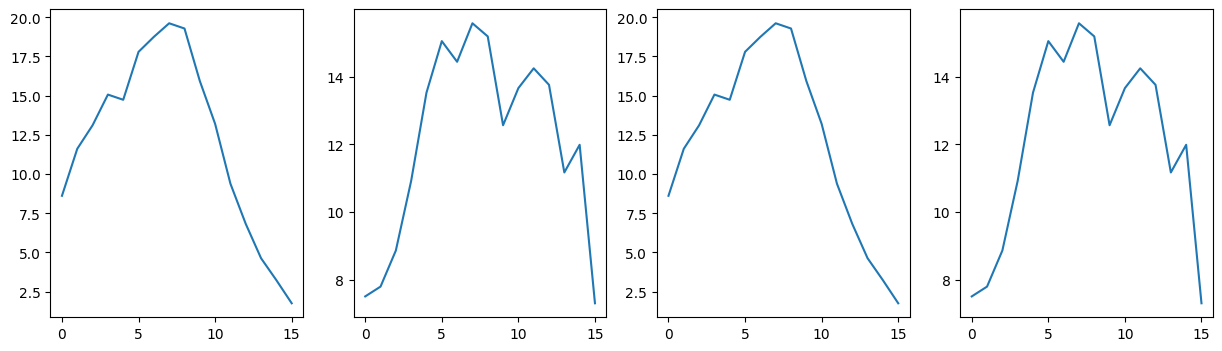

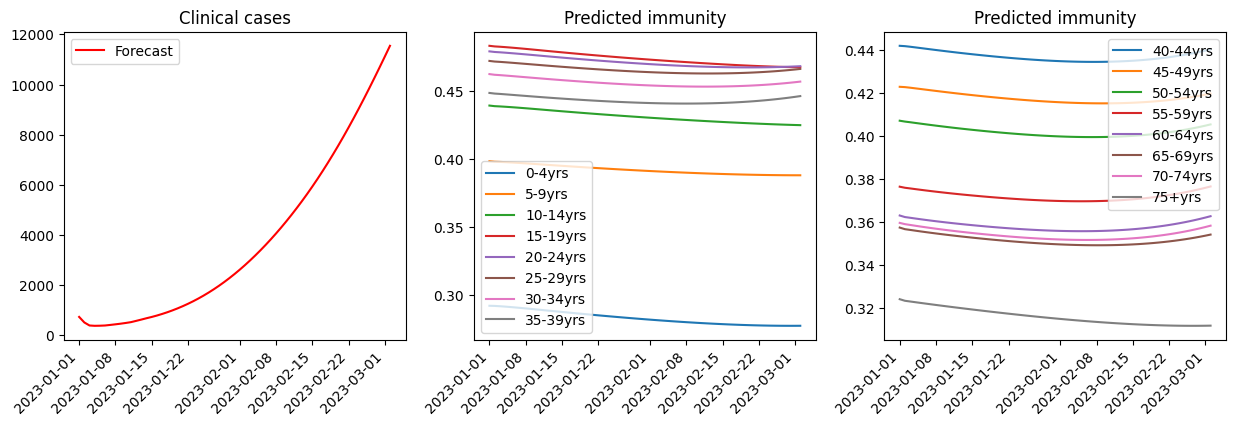

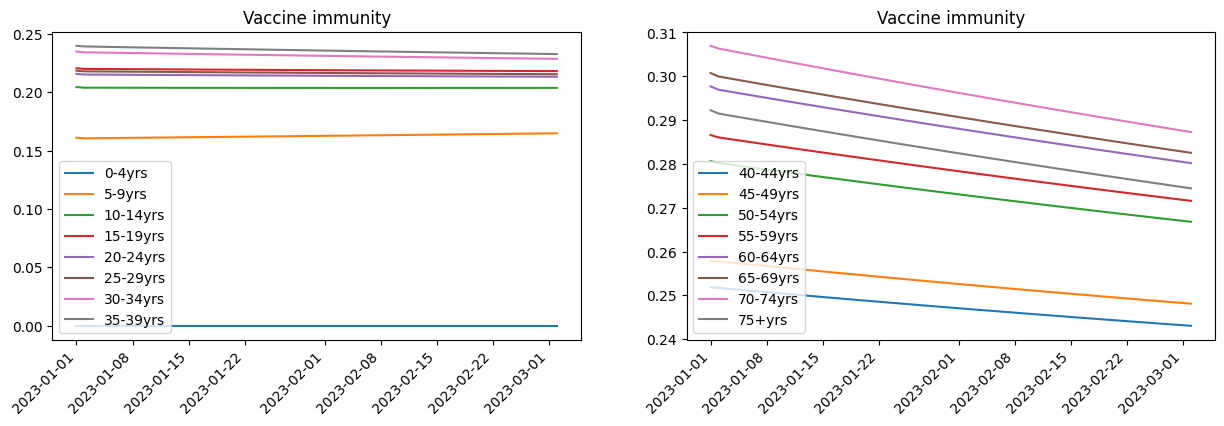

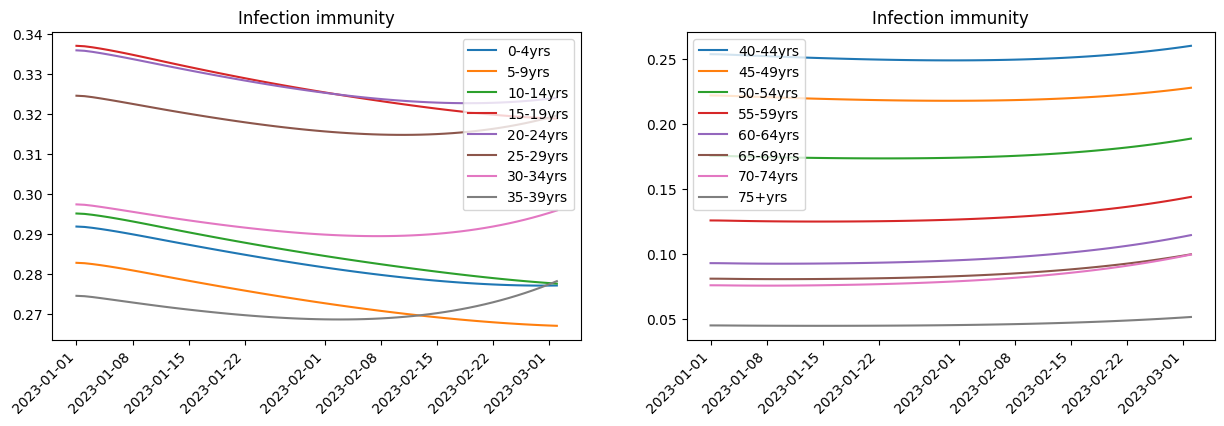

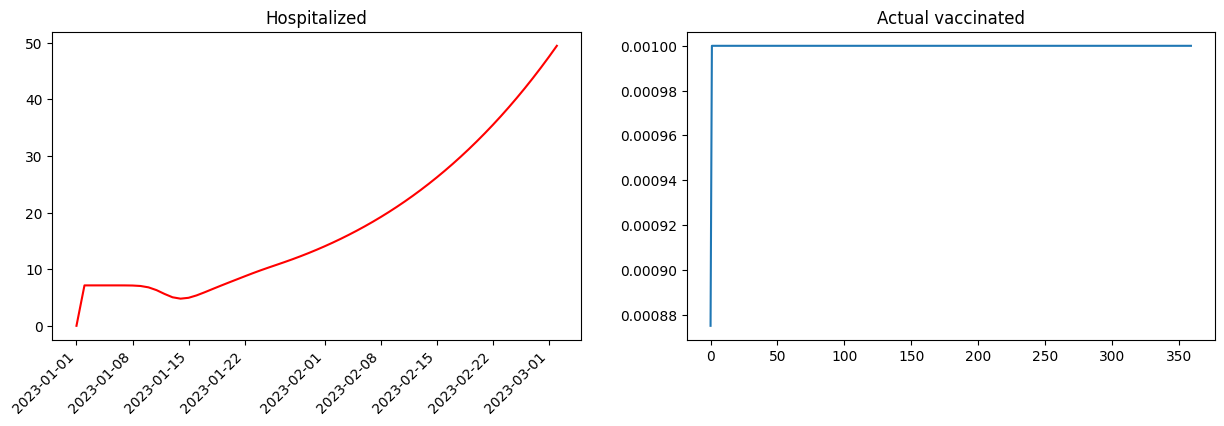

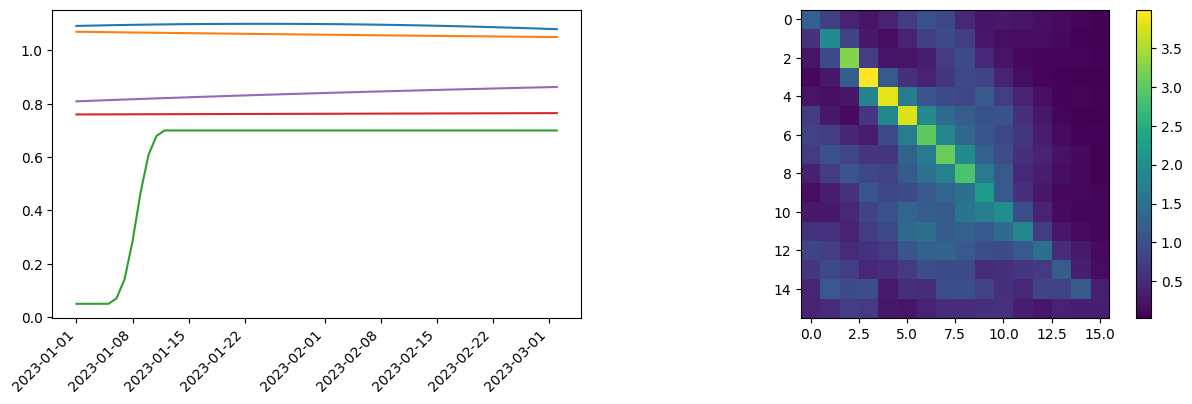

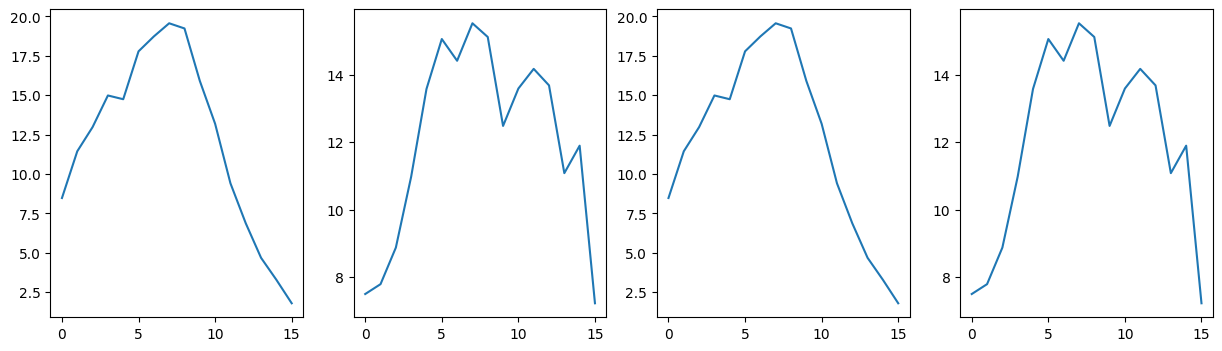

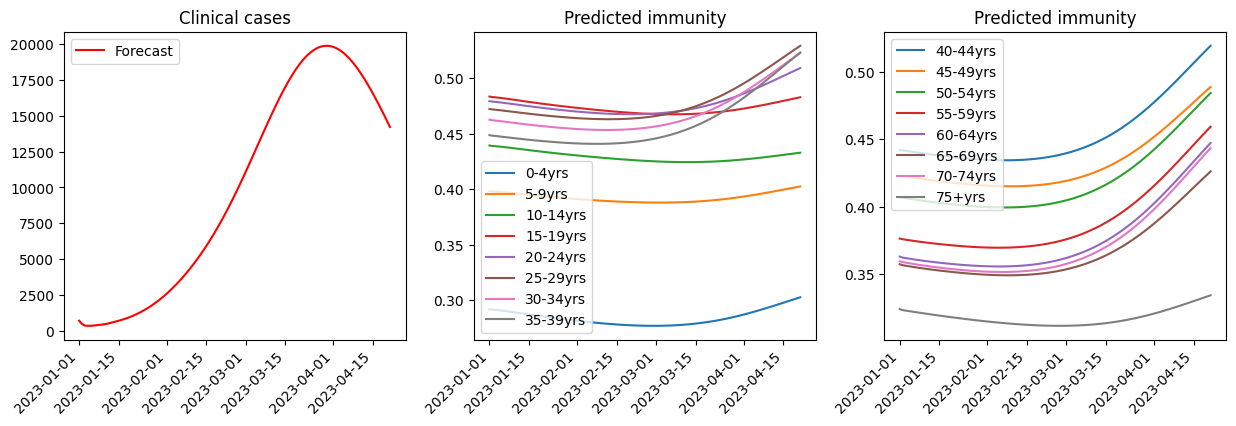

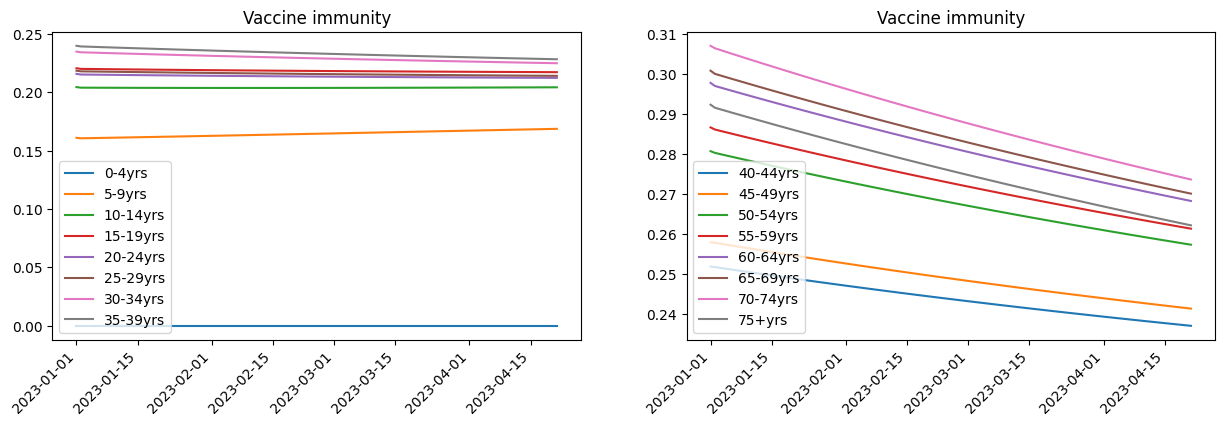

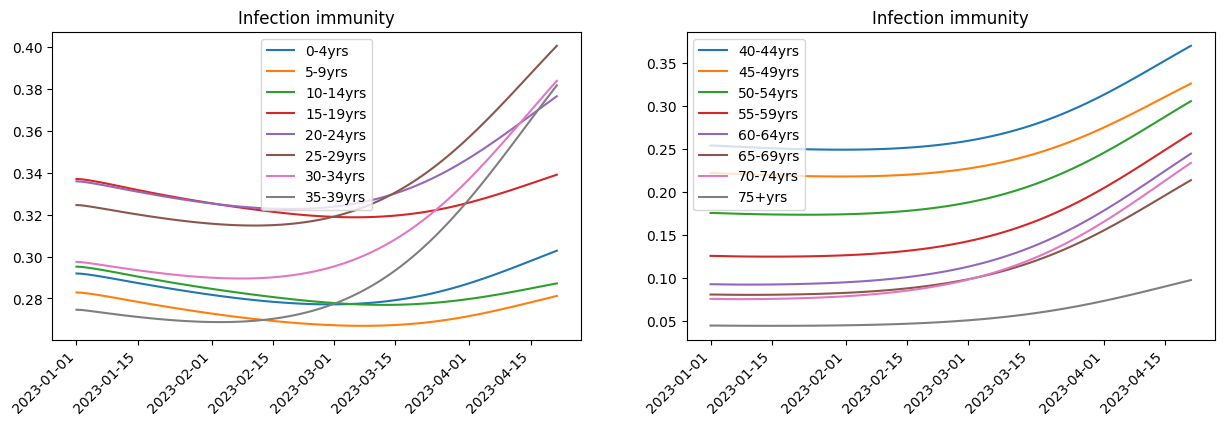

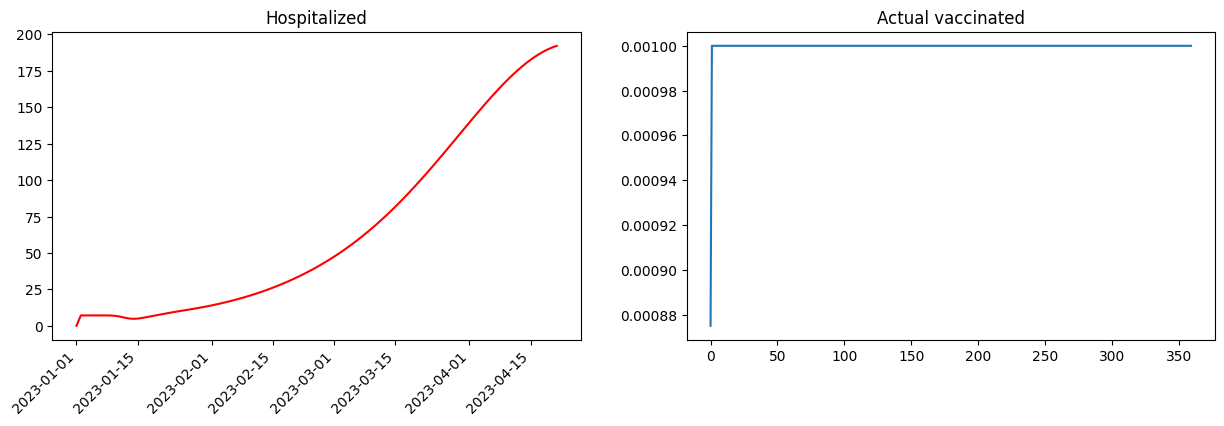

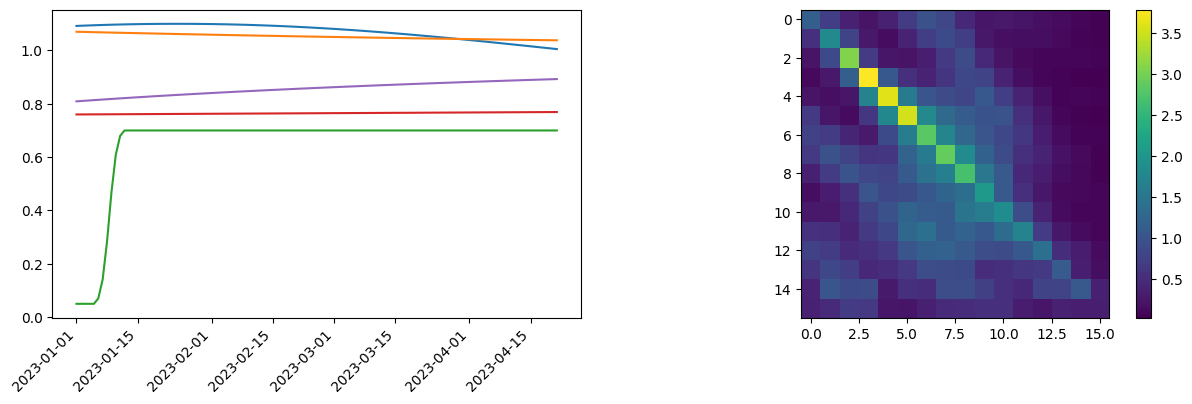

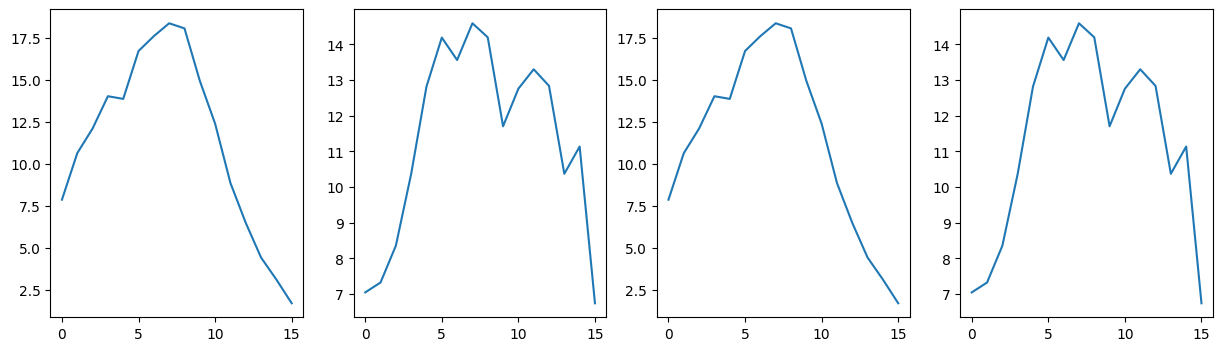

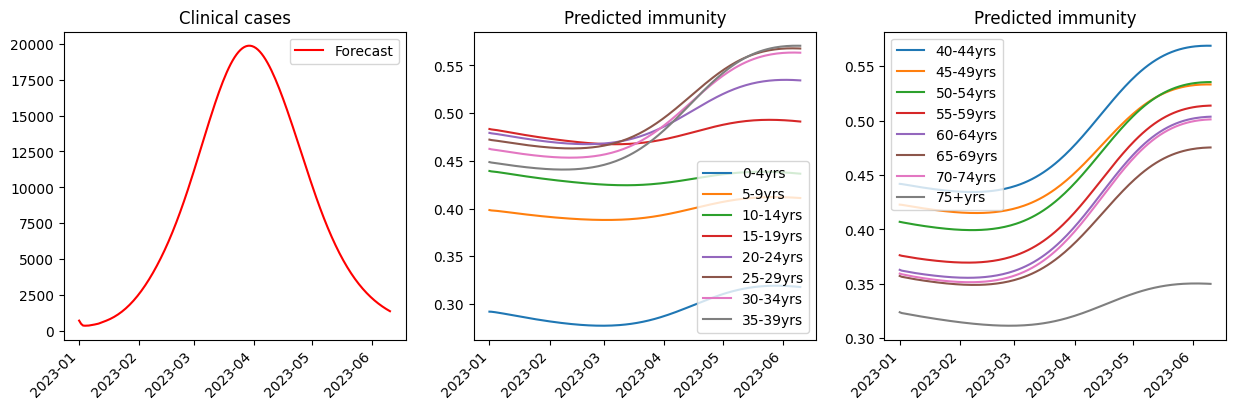

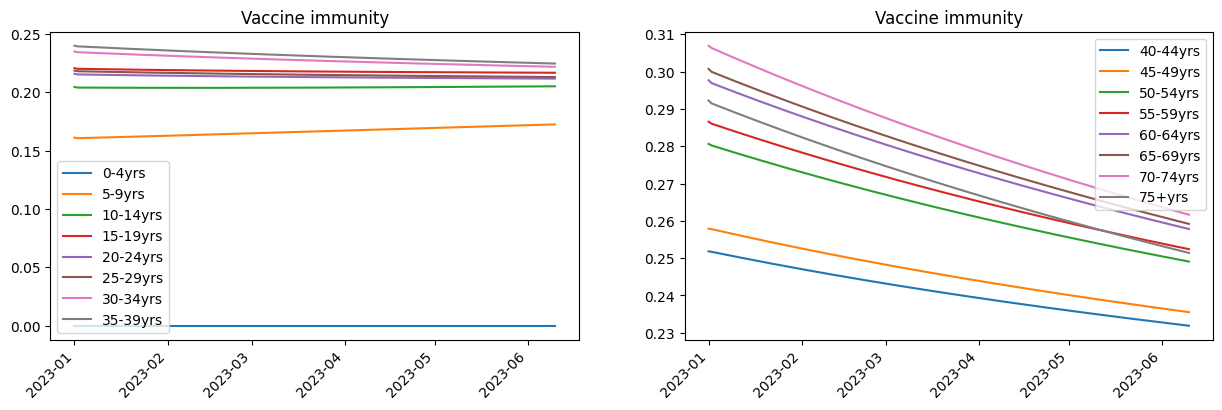

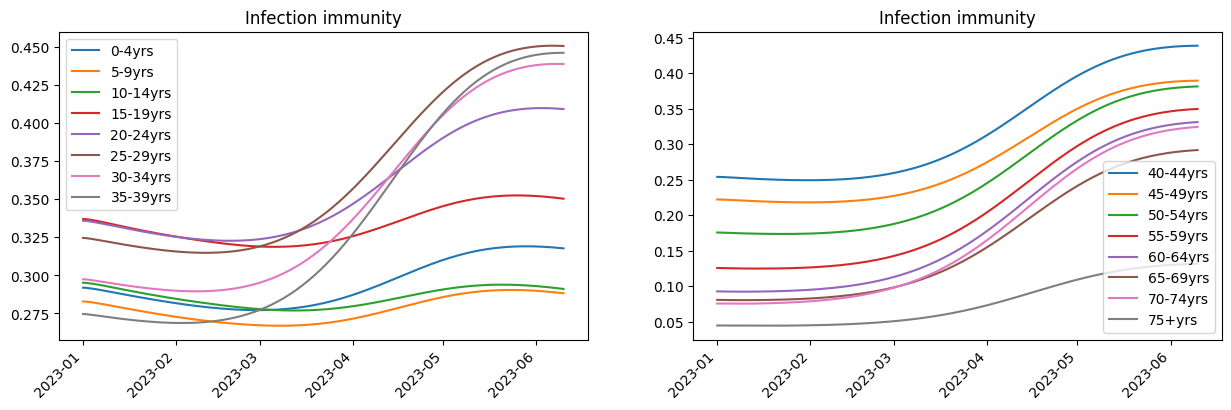

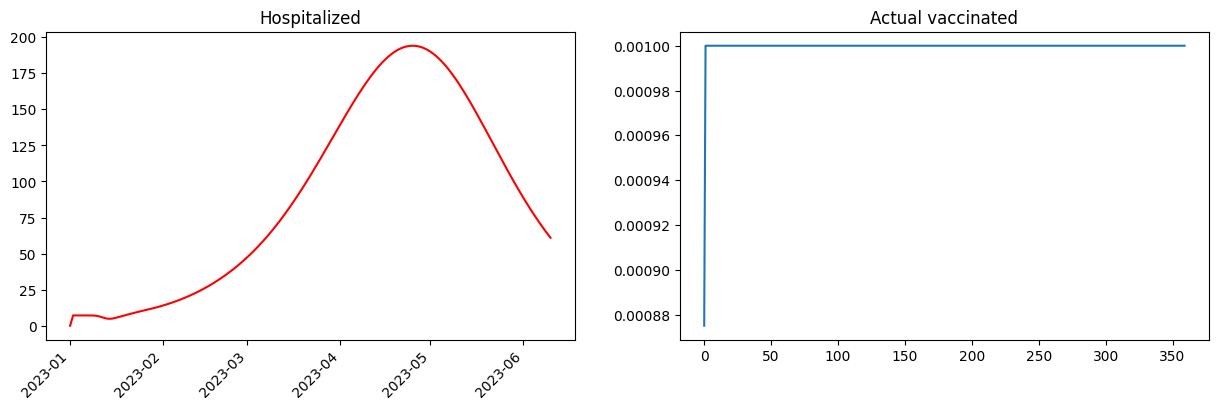

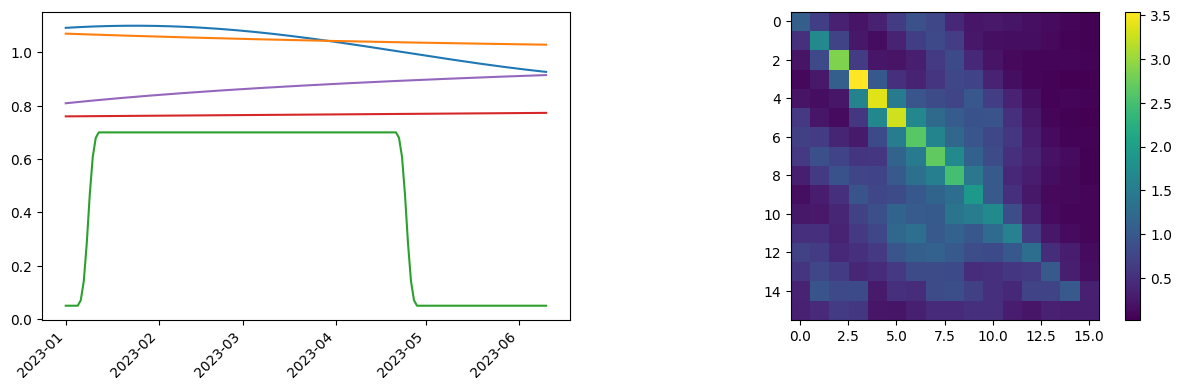

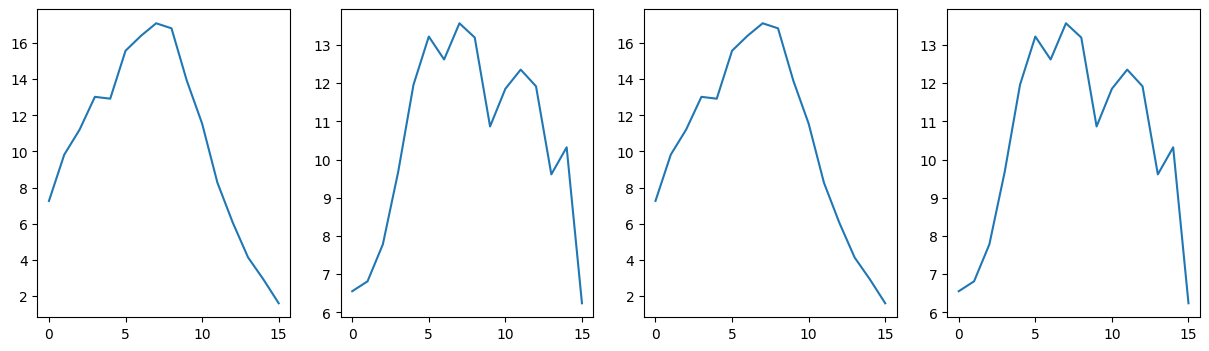

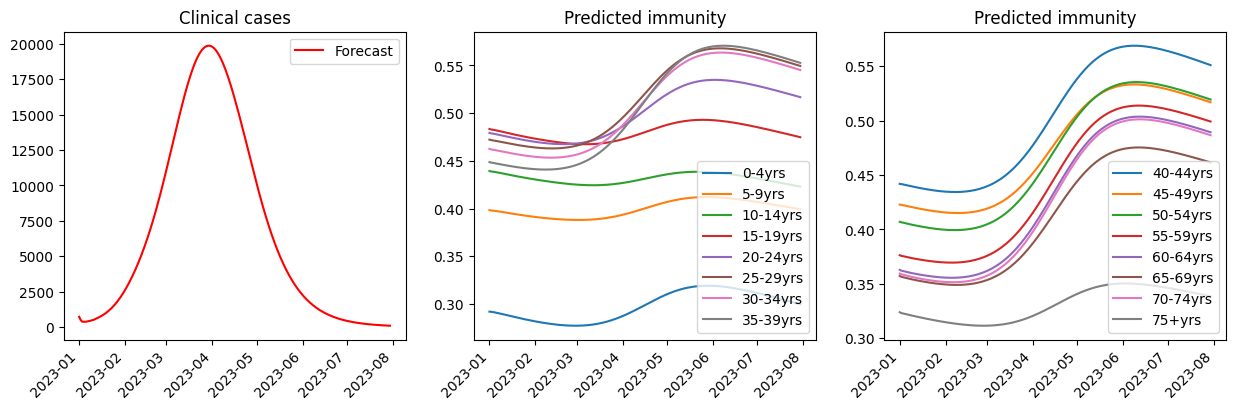

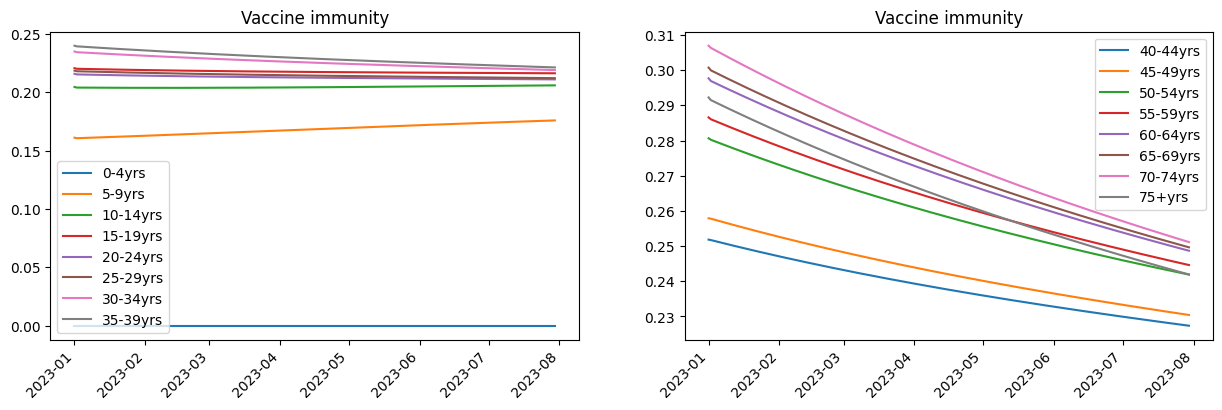

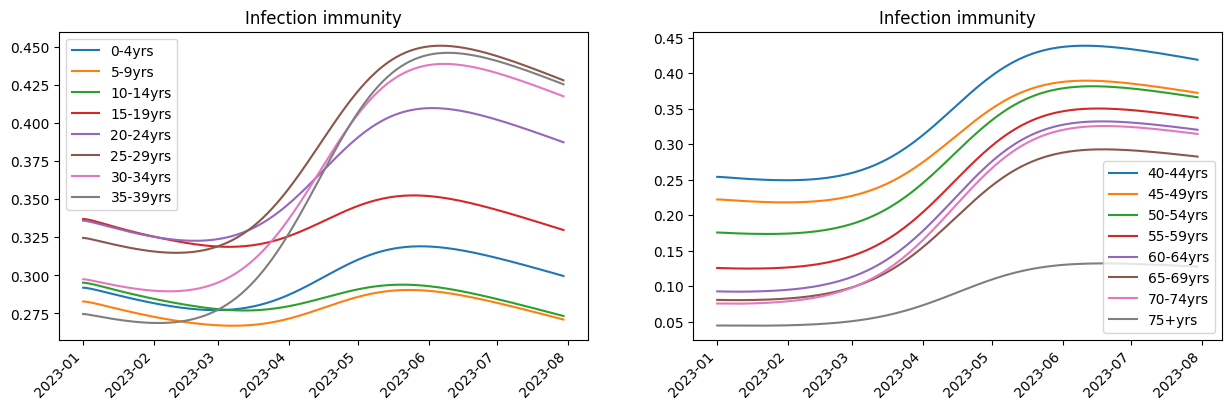

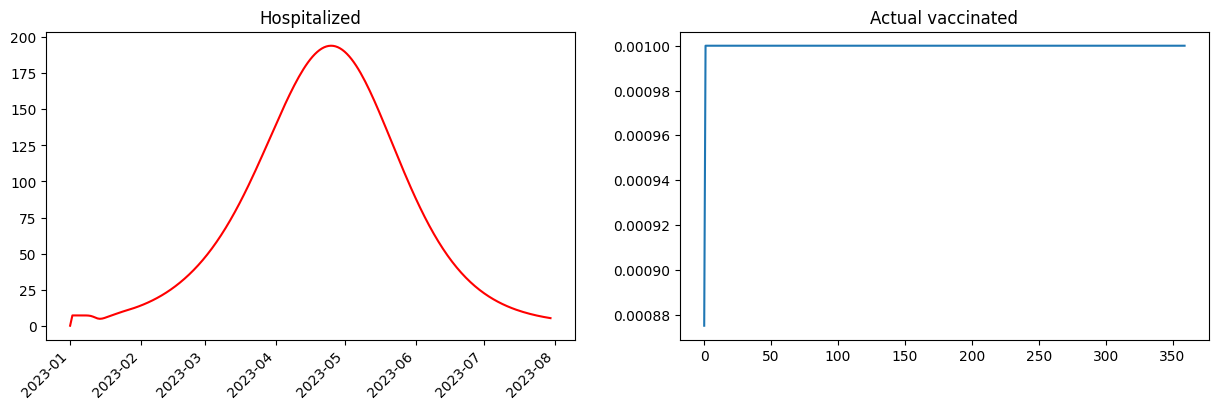

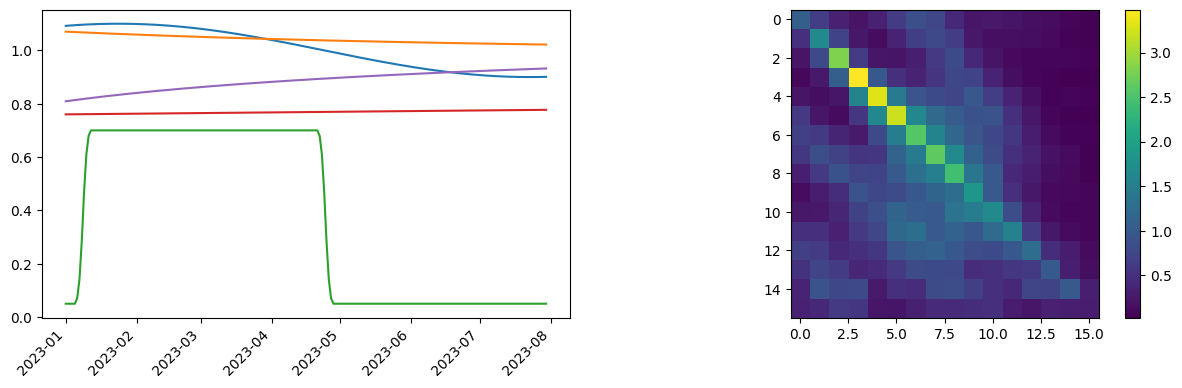

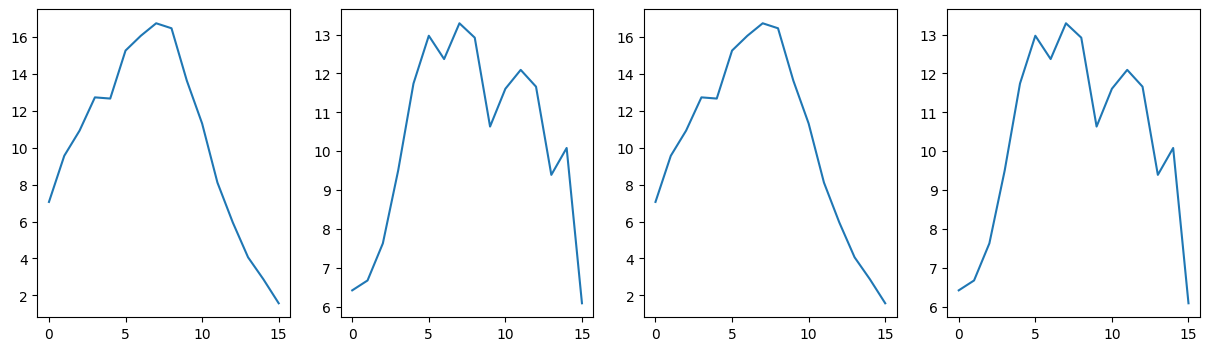

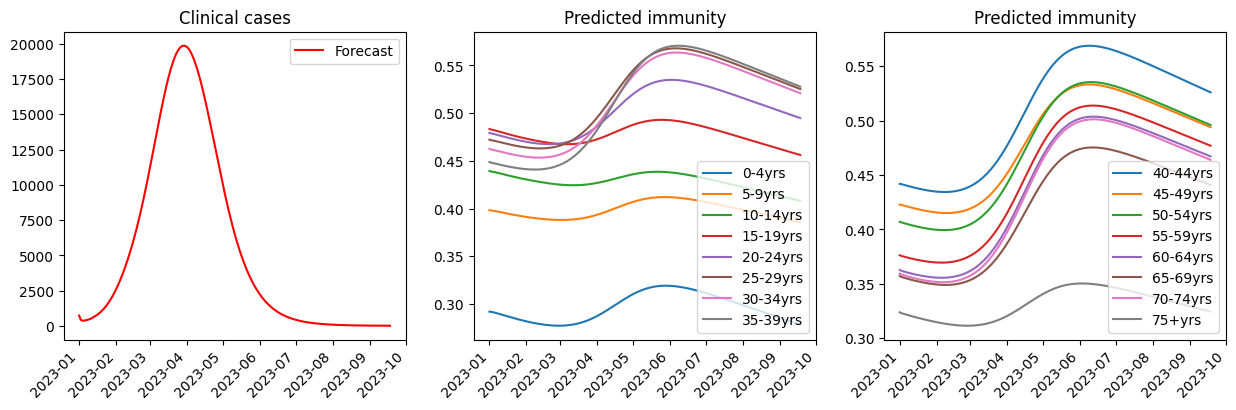

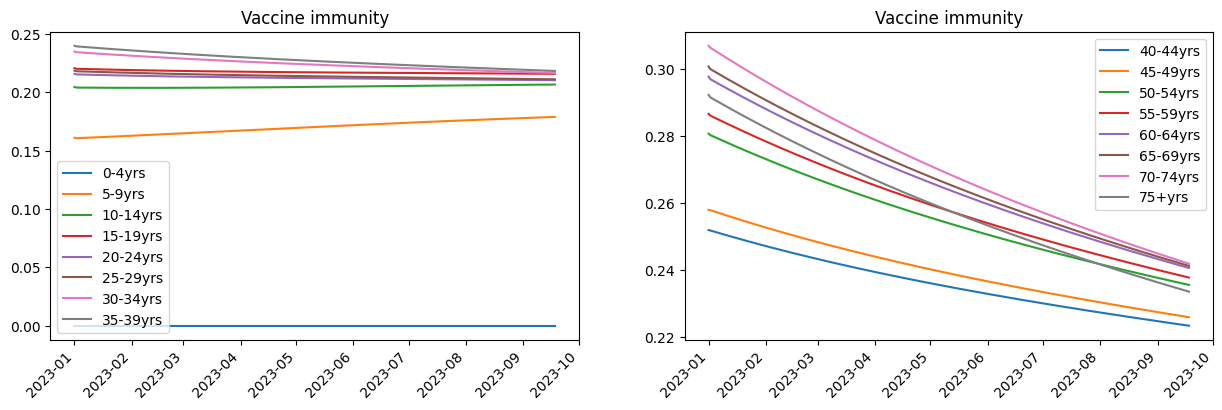

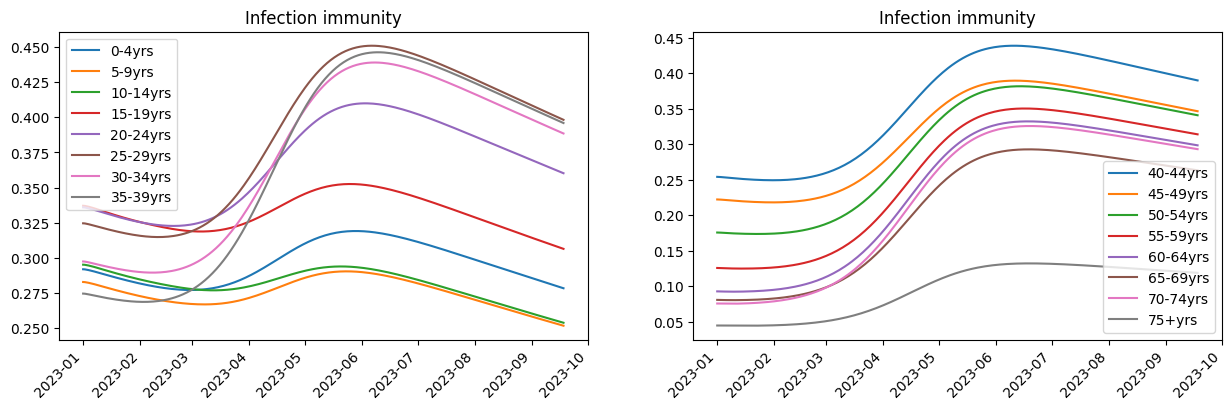

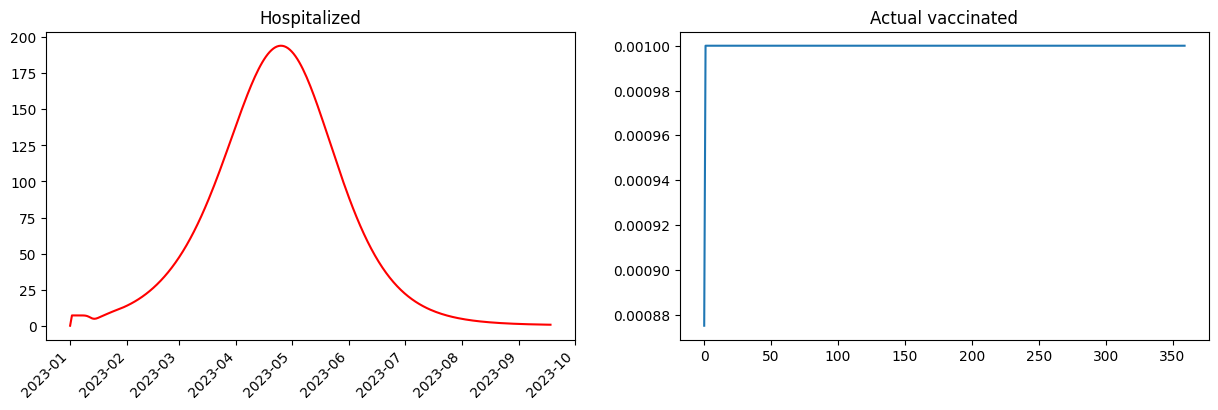

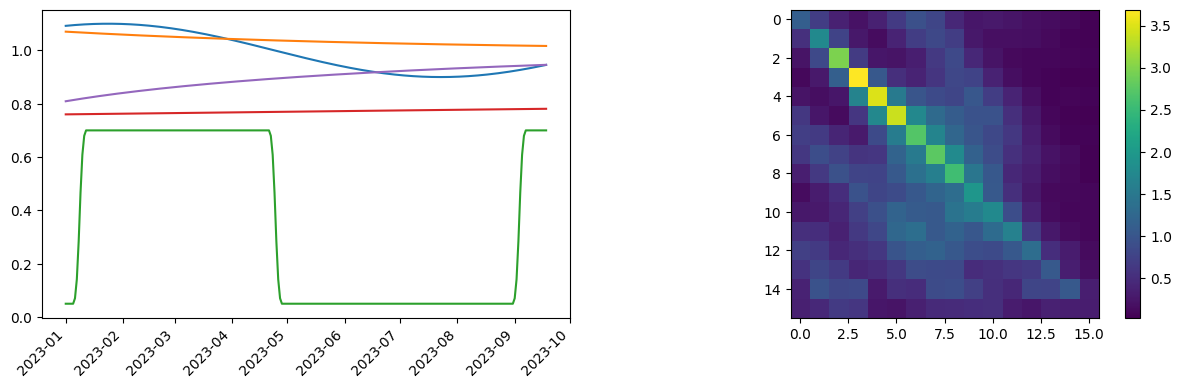

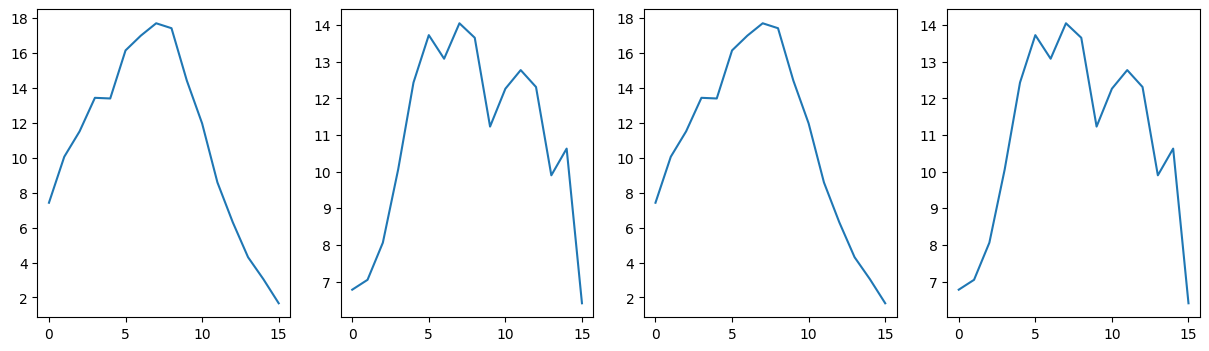

KeyboardInterrupt: 

In [21]:
for i in range(forecast_days):
    m.run_one_cycle(display_status=False)
    if i % 50 == 10 or m.date == 1071:

        x = [Parameters.OUTBREAK_FIRST_DAY + datetime.timedelta(days=j+start_date) for j in range(m.date-start_date)]

        plt.figure(figsize=(15,4))
        plt.subplot()
        plt.subplot(1, 3, 1)
        plt.plot(x, np.sum((np.sum(m.model_data.time_series_clinical_cases, axis=0))[start_date:m.date], axis=1), color='red', label='Forecast')
        plt.legend()
        plt.xticks(rotation=45, ha='right')
        plt.title('Clinical cases')
        plt.subplot(1, 3, 2)
        for j in range(8):
            slice = m.model_data.time_series_immunity[0].T[j].T
            plt.plot(x, slice[start_date:m.date], label=Parameters.AGE_BANDS[j])
        plt.legend()
        plt.xticks(rotation=45, ha='right')
        plt.title('Predicted immunity')
        plt.subplot(1, 3, 3)
        for j in range(8):
            slice = m.model_data.time_series_immunity[0].T[j+8].T
            plt.plot(x, slice[start_date:m.date], label=Parameters.AGE_BANDS[j+8])
        plt.legend()
        plt.xticks(rotation=45, ha='right')
        plt.title('Predicted immunity')
        plt.show()


        plt.figure(figsize=(15,4))
        plt.subplot(1, 2, 1)
        for j in range(8):
            slice = m.model_data.time_series_vaccine_immunity[0].T[j].T
            plt.plot(x, slice[start_date:m.date], label=Parameters.AGE_BANDS[j])
        plt.legend()
        plt.xticks(rotation=45, ha='right')
        plt.title('Vaccine immunity')
        plt.subplot(1, 2, 2)
        for j in range(8):
            slice = m.model_data.time_series_vaccine_immunity[0].T[j+8].T
            plt.plot(x, slice[start_date:m.date], label=Parameters.AGE_BANDS[j+8])
        plt.legend()
        plt.xticks(rotation=45, ha='right')
        plt.title('Vaccine immunity')
        plt.show()

        plt.figure(figsize=(15,4))
        plt.subplot(1, 2, 1)
        for j in range(8):
            slice = m.model_data.time_series_infection_immunity[0].T[j].T
            plt.plot(x, slice[start_date:m.date], label=Parameters.AGE_BANDS[j])
        plt.legend()
        plt.xticks(rotation=45, ha='right')
        plt.title('Infection immunity')
        plt.subplot(1, 2, 2)
        for j in range(8):
            slice = m.model_data.time_series_infection_immunity[0].T[j+8].T
            plt.plot(x, slice[start_date:m.date], label=Parameters.AGE_BANDS[j+8])
        plt.legend()
        plt.xticks(rotation=45, ha='right')
        plt.title('Infection immunity')
        plt.show()


        plt.figure(figsize=(15,4))
        plt.subplot()
        plt.subplot(1, 2, 1)
        plt.plot(x, np.sum((np.sum(m.model_data.time_series_hospitalized, axis=0))[start_date:m.date], axis=1), color='red', label='Forecast')
        plt.title('Hospitalized')
        plt.xticks(rotation=45, ha='right')
        plt.subplot(1, 2 ,2), plt.plot(np.mean(moving_average_compare_vaccine(m.model_data.time_series_vaccinated, 2)[start_date:], axis=1)), plt.title('vaccine 3')
        plt.title('Actual vaccinated')
        plt.show()

        plt.figure(figsize=(15,4))
        plt.subplot(1, 2, 1)
        plt.plot(x, Parameters.SEASONALITY[start_date:m.date])
        plt.plot(x, m.dependency.mobility[start_date:m.date])
        plt.xticks(rotation=45, ha='right')
        plt.subplot(1, 2, 2)
        matrix = m._synthesize_matrix(contact_type=0, contact_pattern='day') + m._synthesize_matrix(contact_type=0, contact_pattern='night')
        plt.imshow(matrix)
        plt.colorbar()
        plt.show()

        plt.figure(figsize=(15,4))
        plt.subplot(1, 4, 1), plt.plot(np.matmul(matrix.T, np.ones(shape=(16, 1))))
        plt.subplot(1, 4, 2), plt.plot(np.matmul(matrix, np.ones(shape=(16, 1))))
        plt.subplot(1, 4, 3), plt.plot(np.sum(matrix, axis=0))
        plt.subplot(1, 4, 4), plt.plot(np.sum(matrix, axis=1))
        plt.show()

## Display post-forecast data

In [ ]:
deaths = moving_average_compare(data.time_series_deaths)
cases = moving_average_compare(data.time_series_clinical_cases)
hospitalized = moving_average_compare(data.time_series_hospitalized)

plt.figure(figsize=(15,4))
plt.subplot()
plt.subplot(1,3,1), plt.plot(range(0, deaths.shape[0]), np.sum(deaths, axis=1)), plt.title('Number of deaths')
plt.subplot(1,3,2), plt.plot(range(0, cases.shape[0]), np.sum(cases, axis=1)), plt.title('Number of cases')
plt.subplot(1,3,3), plt.plot(range(0, hospitalized.shape[0]), np.sum(hospitalized, axis=1)), plt.title('Number of hospitalizations')
plt.show()

In [ ]:
vaccinated = moving_average_compare(data.time_series_vaccinated)
immunity = moving_average_compare(data.time_series_immunity)
icu = moving_average_compare(data.time_series_ICU)

plt.figure(figsize=(15,4))
plt.subplot()
plt.subplot(1,3,1), plt.plot(range(0, vaccinated.shape[0]), np.sum(vaccinated, axis=1)), plt.title('Percentage of vaccinated individuals')
plt.subplot(1,3,2), plt.plot(range(0, immunity.shape[0]), immunity), plt.title('Immunity')
plt.subplot(1,3,3), plt.plot(range(0, icu.shape[0]), np.sum(icu, axis=1)), plt.title('Number of icu admissions')
plt.show()

## Save the data to local files.

In [ ]:
save = False
if save:
    m.save_to_file()
print('Done!')